# Playing with CryptoWatch API

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
x = np.linspace(0, 10, 500)
y = np.cumsum(np.random.randn(500, 6), 0)

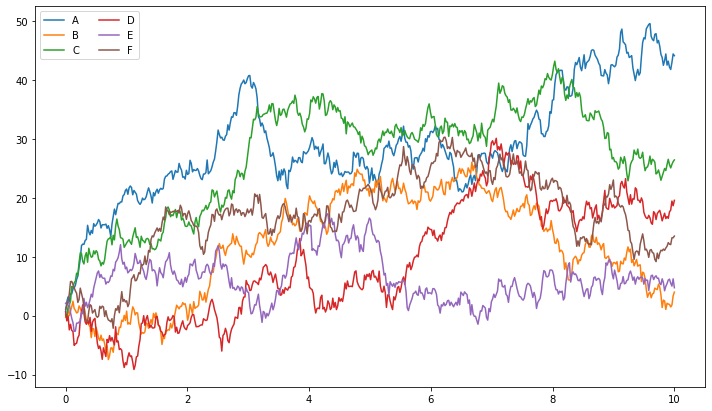

In [8]:
plt.figure(figsize=(12,7))
plt.plot(x,y)
plt.legend('ABCDEF', ncol=2, loc='upper left')

# Interacting with Data

In [2]:
import requests
import pandas as pd

In [3]:
def get_historic_price(symbol, exchange='bitfinex', after='2018-09-01'):
    url = 'https://api.cryptowat.ch/markets/{exchange}/{symbol}usd/ohlc'.format(
        symbol=symbol, exchange=exchange)
    resp = requests.get(url, params={
        'periods': '3600',
        'after': str(int(pd.Timestamp(after).timestamp()))
    })
    resp.raise_for_status()
    data = resp.json()
    df = pd.DataFrame(data['result']['3600'], columns=[
        'CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'NA'
    ])
    df['CloseTime'] = pd.to_datetime(df['CloseTime'], unit='s')
    df.set_index('CloseTime', inplace=True)
    return df

In [4]:
last_week = (pd.Timestamp.now() - pd.offsets.Day(7))
last_week

Timestamp('2022-07-22 11:58:02.432203')

In [5]:
btc = get_historic_price('btc', 'bitstamp', after=last_week)
btc

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2022-07-22 12:00:00,23451.29,23634.39,23421.69,23622.75,80.773629,1.901842e+06
2022-07-22 13:00:00,23608.27,23727.40,23582.08,23596.78,116.024042,2.744843e+06
2022-07-22 14:00:00,23596.78,23760.87,23435.39,23468.73,111.373692,2.626426e+06
2022-07-22 15:00:00,23473.03,23680.71,23334.43,23659.24,191.089830,4.487609e+06
2022-07-22 16:00:00,23672.92,23677.86,23234.35,23300.03,139.804022,3.264985e+06
...,...,...,...,...,...,...
2022-07-29 00:00:00,23977.92,23992.71,23761.86,23853.11,59.006053,1.407655e+06
2022-07-29 01:00:00,23856.91,23950.00,23713.75,23884.20,80.726378,1.923432e+06
2022-07-29 02:00:00,23896.21,23899.30,23755.15,23866.39,27.441222,6.534040e+05


In [7]:
eth = get_historic_price('eth', 'bitstamp', after=last_week)
eth

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2022-07-22 12:00:00,1624.61,1640.98,1622.52,1640.00,684.616973,1.116827e+06
2022-07-22 13:00:00,1638.72,1645.30,1624.87,1624.87,343.016915,5.599766e+05
2022-07-22 14:00:00,1626.27,1631.69,1598.31,1601.47,1227.137371,1.981338e+06
2022-07-22 15:00:00,1600.41,1616.96,1589.14,1612.77,2323.278073,3.717663e+06
2022-07-22 16:00:00,1611.59,1613.63,1570.41,1574.87,1267.284128,2.013290e+06
...,...,...,...,...,...,...
2022-07-29 00:00:00,1747.15,1747.62,1711.62,1725.56,799.027658,1.379971e+06
2022-07-29 01:00:00,1727.00,1733.26,1694.35,1727.19,980.375142,1.679359e+06
2022-07-29 02:00:00,1727.11,1729.23,1703.91,1717.50,217.358274,3.730096e+05


**Bitcoin**

In [8]:
btc.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2022-07-22 12:00:00,23451.29,23634.39,23421.69,23622.75,80.773629,1.901842e+06
2022-07-22 13:00:00,23608.27,23727.40,23582.08,23596.78,116.024042,2.744843e+06
2022-07-22 14:00:00,23596.78,23760.87,23435.39,23468.73,111.373692,2.626426e+06
2022-07-22 15:00:00,23473.03,23680.71,23334.43,23659.24,191.089830,4.487609e+06
2022-07-22 16:00:00,23672.92,23677.86,23234.35,23300.03,139.804022,3.264985e+06


<AxesSubplot:xlabel='CloseTime'>

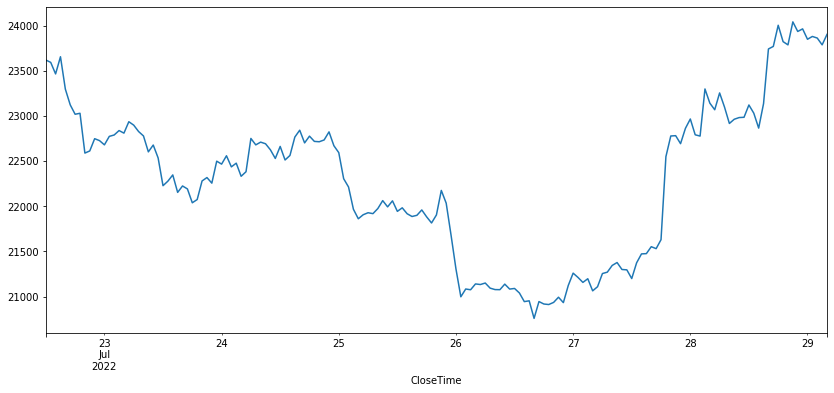

In [10]:
btc['ClosePrice'].plot(figsize=(14,6))

**ETH**

In [11]:
eth.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2022-07-22 12:00:00,1624.61,1640.98,1622.52,1640.00,684.616973,1.116827e+06
2022-07-22 13:00:00,1638.72,1645.30,1624.87,1624.87,343.016915,5.599766e+05
2022-07-22 14:00:00,1626.27,1631.69,1598.31,1601.47,1227.137371,1.981338e+06
2022-07-22 15:00:00,1600.41,1616.96,1589.14,1612.77,2323.278073,3.717663e+06
2022-07-22 16:00:00,1611.59,1613.63,1570.41,1574.87,1267.284128,2.013290e+06


eth['ClosePrice'].plot(figsize=(14,6))

# Dynamics plots with bokeh

In [15]:
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook

In [16]:
output_notebook()

Loading BokehJS ...

In [23]:
pl = figure(x_axis_type="datetime", title="Crypto Prices", width=800)
pl.grid.grid_line_alpha=0.3
pl.xaxis.axis_label = 'Date'
pl.yaxis.axis_label = 'Price'

pl.line(btc.index, btc['ClosePrice'], color='#f2a900', legend='Bitcoin')

pl.legend.location = "top_left"

show(pl)

# Exporting to Excel

In [25]:
writer = pd.ExcelWriter('cryptos.xlsx')

In [26]:
btc.to_excel(writer, sheet_name='Bitcoin')

In [27]:
eth.to_excel(writer, sheet_name='Ether')

In [28]:
writer.save()